converged: n= 1
learning done
[-1.          2.69710418 -0.27972337]


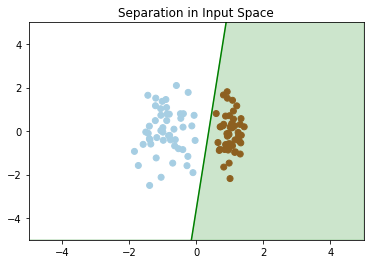

learning done
mismatch[ 1 ]
mismatch[ 2 ]
mismatch[ 11 ]
mismatch[ 12 ]
mismatch[ 13 ]
mismatch[ 15 ]
mismatch[ 17 ]
mismatch[ 24 ]
mismatch[ 29 ]
mismatch[ 34 ]
mismatch[ 37 ]
mismatch[ 40 ]
mismatch[ 49 ]
mismatch[ 50 ]
mismatch[ 52 ]
mismatch[ 64 ]
mismatch[ 65 ]
mismatch[ 71 ]
mismatch[ 74 ]
mismatch[ 76 ]
mismatch[ 77 ]
mismatch[ 85 ]
mismatch[ 88 ]
mismatch[ 96 ]
[ 0.         -0.47182324 -2.45956403]


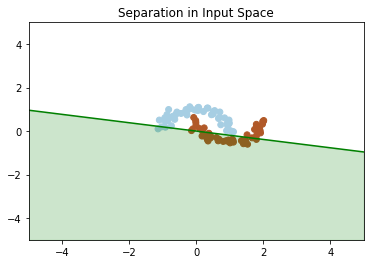

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn import datasets
#linearly separable data sets(only showed vertical or horizontal separation, separable function can be modified to accomplish separation by specific lines)
separable = False
while not separable:
    sample1 = datasets.make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, flip_y=0)
    A = sample1[0][sample1[1] == 0]
    B = sample1[0][sample1[1] == 1]
    separable = any([A[:, k].max() < B[:, k].min() or A[:, k].min() > B[:, k].max() for k in range(2)])
for i in range(0,sample1[1].size,1):
  if sample1[1][i] == 0:
    sample1[1][i]=-1
#non-linearly separable data sets
sample2=datasets.make_moons(n_samples=100, noise=0.1)
for i in range(0,sample2[1].size,1):
  if sample2[1][i] == 0:
    sample2[1][i]=-1
def plr2d_vectorize(X ,T, N):
  b=np.ones((100,1))
  X=np.insert(b,[1],X,axis=1)
  W=np.array([1,1,1])
  for n in range(0,N,1):
    mismatched = False
    for i in range(0,T.size,1):
      z=sum(W*X[i])
      if z*(T[i]) <= 0:
        mismatched = True
        W=W+T[i]*X[i]
    if mismatched == False:
      print("converged: n=",n)
      break
  print("learning done")
  for i in range(0,T.size,1):
    z=sum(W*X[i])
    if z*(T[i]) <= 0:
      print("mismatch[",i,"]")

    # Note: W is shaped nx1 (for w_0,...w_n-1) that includes w0 e.g. [[w0], [w1], [w2], ...]
  return W
def plot_sep(w0,w1, w2,input_feature1,input_feature_2,input_target, color='green'):
  ''' Plot decision boundary hypothesis
  w1 * sepal_len + w2 * sepal_wid = 0
  in input space, highlighting the hyperplane '''
  plt.scatter(input_feature1,input_feature_2,c=input_target,cmap=plt.cm.Paired)
  plt.title("Separation in Input Space")
  plt.ylim([-5,5])
  plt.xlim([-5,5])
  if w2 != 0:
     m = -w1/w2
     t = 1 if w2 > 0 else -1
     plt.plot([-5,5],[-5*m-w0/w2, 5*m-w0/w2],'-y',color=color)
     plt.fill_between(
                    [-5, 5],
                    [m*-5-w0/w2, m*5-w0/w2],
                    [t*5, t*5],
                    alpha=0.2,
                    color=color)
  if w2 == 0: # decision boundary is vertical
      t = 1 if w1 > 0 else -1
      plt.plot([0, 0],[-5, 5],'-y',color=color)
      plt.fill_between(
                    [0, 5*t],
                    [-5, -5],
                    [5, 5],
                    alpha=0.2,
                    color=color)
W=plr2d_vectorize(sample1[0],sample1[1],100)  
print(W)  
plot_sep(W[0],W[1],W[2],sample1[0][:,0],sample1[0][:,1],sample1[1])  
plt.show()  
W2=plr2d_vectorize(sample2[0],sample2[1],100)  
print(W2)  
plot_sep(W2[0],W2[1],W2[2],sample2[0][:,0],sample2[0][:,1],sample2[1]) 
plt.show()

Step   0 | Loss 0.86
Step  50 | Loss 0.85
Step 100 | Loss 0.83
Step 150 | Loss 0.81
Step 200 | Loss 0.80
Step 250 | Loss 0.78
Step 300 | Loss 0.76
Step 350 | Loss 0.75
Step 400 | Loss 0.73
Step 450 | Loss 0.72
Step 500 | Loss 0.70
Step 550 | Loss 0.69
Step 600 | Loss 0.68
Step 650 | Loss 0.66
Step 700 | Loss 0.65
Step 750 | Loss 0.64
Step 800 | Loss 0.62
Step 850 | Loss 0.61
Step 900 | Loss 0.60
Step 950 | Loss 0.58


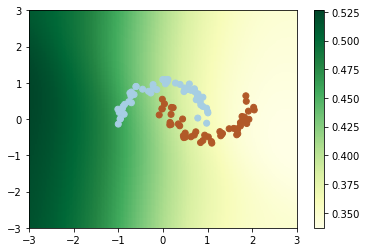

In [ ]:
from scipy.special import expit as sigmoid
import math
params = {}
params['U'] = np.random.randn(3, 2)
params['b'] = np.zeros(3)
params['W'] = np.random.randn(3)
params['c'] = 0
def backprop(X, t, params):
  N = X.shape[0]
  G = np.dot(X, params['U'].T)  + params['b']
  H = np.tanh(G)
  z = np.dot(H, params['W'].T) + params['c']
  y = sigmoid(z)
  loss = (1./N) * np.sum(-t * np.log(y) - (1 - t) * np.log(1 - y))
  E_bar = 1
  z_bar = (1./N) * (y - t)
  W_bar = np.dot(H.T, z_bar)
  c_bar = np.dot(z_bar, np.ones(N))
  H_bar = np.outer(z_bar, params['W'].T)
  G_bar = H_bar * (1 - np.tanh(G)**2)
  U_bar = np.dot(G_bar.T, X)
  b_bar = np.dot(G_bar.T, np.ones(N))
  grads = {}
  grads['U'] = U_bar
  grads['b'] = b_bar
  grads['W'] = W_bar
  grads['c'] = c_bar
    
  return grads, loss
num_steps = 1000
alpha = 0.0005
for step in range(num_steps):        
    grads, loss = backprop(sample2[0],sample2[1], params)
    for k in params:
        params[k] -= alpha * grads[k]

    # Print loss every so often.
    if step % 50 == 0:
        print("Step {:3d} | Loss {:3.2f}".format(step, loss))
def forward(X, params):    
    G = np.dot(X, params['U'].T)  + params['b']
    H = np.tanh(G)
    z = np.dot(H, params['W'].T) + params['c']
    y = sigmoid(z)
    
    return y
num_points = 200
x1s = np.linspace(-3.0, 3.0, num_points)
x2s = np.linspace(-3.0, 3.0, num_points)

points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
Y = forward(points, params).reshape(num_points, num_points)
X1, X2 = np.meshgrid(x1s, x2s)

plt.pcolormesh(X1, X2, Y, cmap=plt.cm.get_cmap('YlGn'))
plt.colorbar()
plt.scatter(sample2[0][:,0],sample2[0][:,1],c=sample2[1],cmap=plt.cm.Paired) 